In [222]:
import pandas as pd


file=pd.read_csv('Alcohol.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [223]:
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q2A LIVED WITH AT LEAST 1 BIOLOGICAL PARENT BEFORE AGE 18
#S1Q2B BIOLOGICAL FATHER EVER LIVE IN HOUSEHOLD BEFORE RESPONDENT WAS 18
#S1Q2C1 RAISED BY ADOPTIVE PARENTS BEFORE AGE 18
#S1Q2C3 RAISED BY FOSTER PARENTS BEFORE AGE 18
#S1Q2C4 RAISED IN AN INSTITUTION BEFORE AGE 18
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED

#Select columns

df=file[['S2AQ21A','S1Q2A','S1Q2B','S1Q2C1','S1Q2C3','S1Q2C4','S1Q6A']

SyntaxError: unexpected EOF while parsing (<ipython-input-223-1260dc7c0805>, line 11)

In [304]:
#rename columns
df=df.rename(columns={'S2AQ21A':'alcoholic_score','S1Q6A':'school_level'})


In [ ]:
#eliminate Nan Values and type modifications
import numpy as np
df.alcoholic_score= df.alcoholic_score.replace(r'^\s*$', np.nan, regex=True)
df.school_level= df.school_level.replace(r'^\s*$', np.nan, regex=True)
df = df[df['alcoholic_score'].notna()]
df = df[df['school_level'].notna()]
df['alcoholic_score']=df['alcoholic_score'].astype(int)


In [244]:
alcolist=df[df['alcoholic_score']<4].count()
print('total number of alcolist')
print(alcolist[0])

total number of alcolist
10302


In [ ]:
#percentage of alcolist with lower school instruction
a=df[(df['alcoholic_score']<4)&(df['school_level']<8)].count()
#percentage of alcolist with medium school instruction
b=df[(df['alcoholic_score']<4)&(df['school_level']>7)&(df['school_level']<12)].count()
#percentage of alcolist with upper school instruction
c=df[(df['alcoholic_score']<4)&(df['school_level']>11)].count()

print('percentage of each group')
print((a[0],b[0],c[0])/alcolist[0])

In [ ]:
#people with familiar problems

d=df[(df['S1Q2A']==2)&(df['alcoholic_score']<4)].count()
e=df[(df['S1Q2B']==2)&(df['alcoholic_score']<4)].count()
f=df[(df['S1Q2C1']==1)&(df['alcoholic_score']<4)].count()
g=df[(df['S1Q2C3']==1)&(df['alcoholic_score']<4)].count()
h=df[(df['S1Q2C4']==1)&(df['alcoholic_score']<4)].count()

print('total number of S1Q2A,S2Q2B,S1Q2C1,S1Q2C3,S2Q2C4')
print(d[0],e[0],f[0],g[0],h[0])
print('percentages of S1Q2A,S2Q2B,S1Q2C1,S1Q2C3,S2Q2C4')
print((d[0],e[0],f[0],g[0],h[0])/alcolist[0])

In [255]:
#childrens which LIVED WITH AT LEAST 1 BIOLOGICAL PARENT BEFORE AGE 18
# or which BIOLOGICAL FATHER EVER LIVE IN HOUSEHOLD BEFORE RESPONDENT WAS 18  
#it is a categorical value so I add the variables in a logical way: or condition will give me the childrens raised in previous conditions
f=df[(df['S1Q2A']==2)|(df['S1Q2B']==2)].count()
g=df[((df['S1Q2A']==2)|(df['S1Q2B']==2) )& (df['alcoholic_score']<4)].count()
print('childrens with this conditions:',f[0])
print('childrens with this conditions who became alcolist:',g[0])
print('percentage of children with this conditins who became alcolist:',g[0]/f[0])
print('percentage on tatal numer of alcolist:',g[0]/alcolist[0])


childrens with this conditions: 906
childrens with this conditions who became alcolist: 272
percentage of children with this conditins who became alcolist: 0.30022075055187636
percentage on tatal numer of alcolist: 0.026402640264026403


In [305]:
df['alcoholic_score'].describe()

count    34827.000000
mean         6.746892
std         11.470926
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         99.000000
Name: alcoholic_score, dtype: float64

Text(0.5, 1.0, 'TOTAL ALCOHOLIC SCORE')

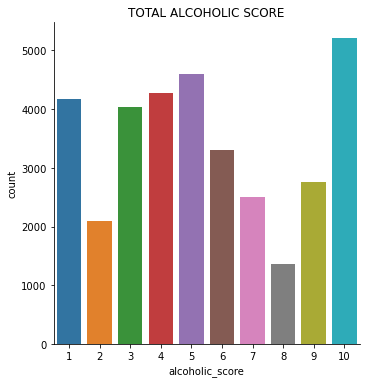

In [303]:
import seaborn
import matplotlib.pyplot as plt

grouped=df.groupby('alcoholic_score').size().reset_index(name='count')
grouped=grouped.drop([10],axis=0)
seaborn.catplot(x="alcoholic_score",y="count",data=grouped,kind="bar")
plt.xlabel('alcoholic_score')   
plt.title('TOTAL ALCOHOLIC SCORE')